## About

This chart displays the **percentage of wins and losses** of football teams with a [lollipop chart](/lollipop-plot), originally created by [Cédric Scherer](https://www.cedricscherer.com/) in R. You can find the R version [here](https://r-graph-gallery.com/web-dumbell-chart.html).

This post is a reproduction of it in Python by [Joseph Barbier](https://barbierjoseph.com).

As a teaser, here is the chart we will reproduce:

![preview final chart](https://r-graph-gallery.com/img/graph/web-dumbell-chart-original.png?raw=true)

## Libraries

First, we need to install the following libraries:

In [1]:
# libraries
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
import pandas as pd

## Dataset

We start by **manually creating** the dataset and put it in a pandas dataframe.

Then we just need to to divide the number of wins and losses by the total number of games to get the **win/loss rate**.

In [36]:
df = pd.DataFrame({
    "team": ["FC Bayern München", "SV Werder Bremen", "Borussia Dortmund", "VfB Stuttgart", 
             "Borussia M'gladbach", "Hamburger SV", "Eintracht Frankfurt",
             "FC Schalke 04", "1. FC Köln", "Bayer 04 Leverkusen"],
    "matches": [2000, 1992, 1924, 1924, 1898, 1866, 1856, 1832, 1754, 1524],
    "won": [1206, 818, 881, 782, 763, 746, 683, 700, 674, 669],
    "lost": [363, 676, 563, 673, 636, 625, 693, 669, 628, 447]
})

df['won'] = df['won'] / df['matches']
df['lost'] = df['lost'] / df['matches']
df.sort_values(by='matches', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,team,matches,won,lost
0,Bayer 04 Leverkusen,1524,0.438976,0.293307
1,1. FC Köln,1754,0.384265,0.358039
2,FC Schalke 04,1832,0.382096,0.365175
3,Eintracht Frankfurt,1856,0.367996,0.373384
4,Hamburger SV,1866,0.399786,0.334941


## Most simple lollipop chart

Since there is no direct way to create a lollipop chart in matplotlib, we need to **create it ourselves**.

- The code will simply **plot individual lines** for each team using the `hlines()` function and then **plot data points** on top of it using the `scatter()` function.

- The `hlines()` function needs the y-coordinates (which simply is `0`,`1`,`2`,...,`n`, where `n` is the number of team minus 1) and the x-coordinates (which is the win/loss rate).

- The `zorder` parameter is used to make sure the data points are **plotted on top** of the lines.

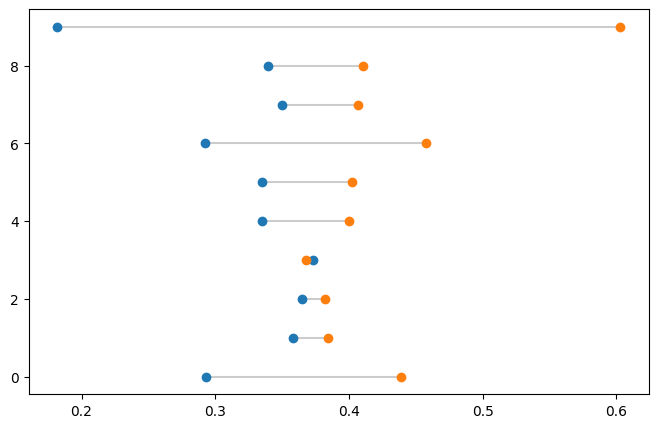

In [3]:
fig, ax = plt.subplots(figsize=(8,5))

# horizontal lines
my_range = range(df['team'].nunique())
ax.hlines(y=my_range, xmin=df['lost'], xmax=df['won'], color='grey', alpha=0.4)

# points
ax.scatter(df['lost'], my_range, zorder=2)
ax.scatter(df['won'], my_range, zorder=2)

plt.show()

## Custom style

Let's add the following features to the chart:

- define `color_lose` and `color_win` to **color** the lollipop chart

- change the **size of the data points** with the `s` argument

- **remove the axis** with `ax.set_axis_off()`

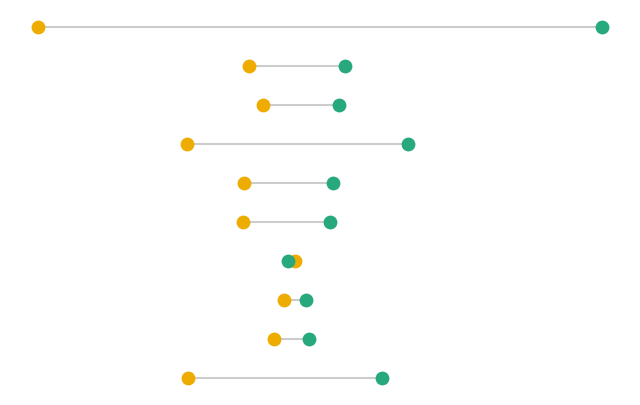

In [4]:
color_lose, color_win = "#EFAC00", "#28A87D"

fig, ax = plt.subplots(figsize=(8,5))

# horizontal lines
my_range = range(df['team'].nunique())
ax.hlines(y=my_range, xmin=df['lost'], xmax=df['won'], color='grey', alpha=0.4)

# points
ax.scatter(df['lost'], my_range, color=color_lose, zorder=2, s=80)
ax.scatter(df['won'], my_range, color=color_win, zorder=2, s=80)

# remove axis
ax.set_axis_off()

plt.show()

## Add team names and values

Now we want to add the **team names** and the **percentage of wins and losses** to the chart.

- In practice we **iterate over the teams** with a `for` loop and add the text with the `ax_text()` function.

- **Text formatting** such as colors and boldness is done thanks to the [highlight_text package](https://python-graph-gallery.com/advanced-custom-annotations-matplotlib/)

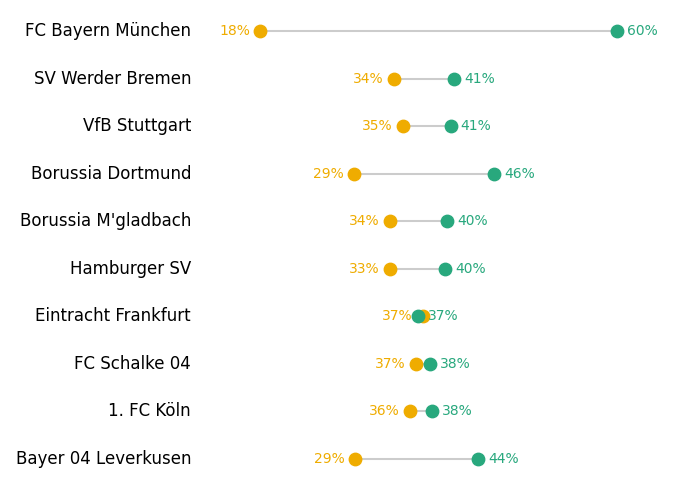

In [6]:
color_lose, color_win = "#EFAC00", "#28A87D"

fig, ax = plt.subplots(figsize=(7,5))

# horizontal lines
my_range = range(df['team'].nunique())
ax.hlines(y=my_range, xmin=df['lost'], xmax=df['won'], color='grey', alpha=0.4)

# points
ax.scatter(df['lost'], my_range, color=color_lose, zorder=2, s=80)
ax.scatter(df['won'], my_range, color=color_win, zorder=2, s=80)

# add team names
n = len(df)
for i in range(df['team'].nunique()):

    # losses
    losses = df['lost'][i]
    ax_text(
        losses-0.012, i,
        f"<{df['lost'][i]*100:.0f}%>",
        ha='right', va='center',
        highlight_textprops=[
            {"color": color_lose,
             "weight": "light"}]
    )

    # wins
    wins = df['won'][i]
    ax_text(
        wins+0.012, i,
        f"<{df['won'][i]*100:.0f}%>",
        ha='left', va='center',
        highlight_textprops=[
            {"color": color_win,
             "weight": "light"}]
    )

    # team names
    team_name = df['team'][i]
    ax_text(0.1, i,
            f"<{team_name}>",
            ha='right', va='center',
            highlight_textprops=[
                {"color": "black",
                 "weight": "light",
                 "size": 12}]
        )
    
# remove axis
ax.set_axis_off()

plt.tight_layout()
plt.show()

## Colors details

In the original post, there is not only yellow and green, but also a **darker version of these colors**. Even if this may sound like a detail, it is actually an **important feature** of the chart since it makes it easier to read values.

With that, we take the opportunity to define a **special case** (with a `if` statement during the loop) for the `FC Bayern München` team that we want to highlight. We add a darker horizontal line and a **bold team name**.

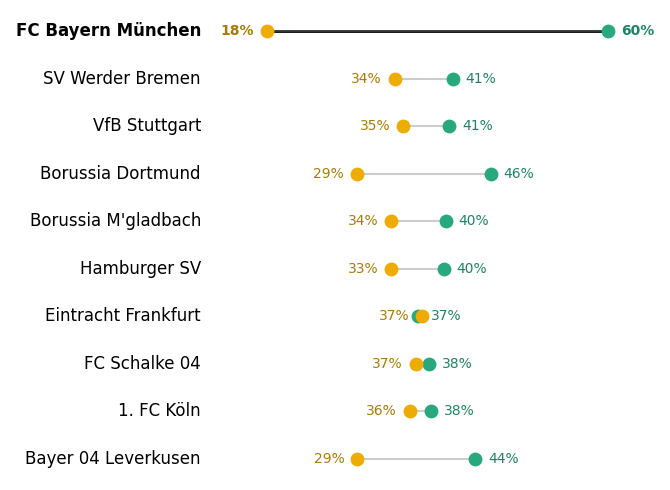

In [7]:
color_lose, color_win = "#EFAC00", "#28A87D"
color_lose_dark, color_win_dark = "#aa7c05", "#1e8563"

fig, ax = plt.subplots(figsize=(7,5))

# horizontal lines
my_range = range(df['team'].nunique())
ax.hlines(y=my_range, xmin=df['lost'], xmax=df['won'], color='grey', alpha=0.4)

# points
ax.scatter(df['lost'], my_range, color=color_lose, zorder=3, s=80)
ax.scatter(df['won'], my_range, color=color_win, zorder=2, s=80)

# add team names
n = len(df)
for i in range(df['team'].nunique()):
    
    # team names
    team_name = df['team'][i]
    if team_name == "FC Bayern München":
        weight = "bold"
        bayern_munch = df[df['team'] == team_name]
        ax.hlines(y=i, xmin=bayern_munch['lost'], xmax=bayern_munch['won'], linewidth=2, color='black', zorder=1)

    else:
        weight = "normal"
    ax_text(0.1, i,
            f"<{team_name}>",
            ha='right', va='center',
            highlight_textprops=[
                {"color": "black",
                 "fontweight": weight,
                 "size": 12}
            ]
        )

    # losses
    losses = df['lost'][i]
    ax_text(
        losses-0.016, i,
        f"<{df['lost'][i]*100:.0f}%>",
        ha='right', va='center',
        highlight_textprops=[
            {"color": color_lose_dark,
             "weight": weight}
        ]
    )

    # wins
    wins = df['won'][i]
    ax_text(
        wins+0.016, i,
        f"<{df['won'][i]*100:.0f}%>",
        ha='left', va='center',
        highlight_textprops=[
            {"color": color_win_dark,
             "weight": weight}]
    )

# remove axis
ax.set_axis_off()

plt.tight_layout()
plt.show()

## Title and annotations

Now that we have the core of the chart, we only need to add a few **annotations**. Since the original chart has some specific fonts, we have to define them before:

First we load the `Familjen Grotesk` font:

In [8]:
# find path to font
from matplotlib import font_manager
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'grotesk' in fontpath.lower():
        print(fontpath)

# get font properties
from matplotlib.font_manager import FontProperties
personal_path = '/Users/josephbarbier/Library/Fonts/'

# font
font_path = personal_path + 'FamiljenGrotesk-VariableFont_wght.ttf'
grotesk_font = FontProperties(fname=font_path)

# bold font
font_path_bold = personal_path + 'FamiljenGrotesk-Bold.ttf'
grotesk_font_bold = FontProperties(fname=font_path_bold)

/Users/josephbarbier/Library/Fonts/FamiljenGrotesk-VariableFont_wght.ttf
/Users/josephbarbier/Library/Fonts/FamiljenGrotesk-SemiBold.ttf
/Users/josephbarbier/Library/Fonts/FamiljenGrotesk-Bold.ttf


Then we load the `Pally` font:

In [25]:
# find path to font
from matplotlib import font_manager
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'pally' in fontpath.lower():
        print(fontpath)

# get font properties
from matplotlib.font_manager import FontProperties
personal_path = '/Users/josephbarbier/Library/Fonts/'

# font
font_path = personal_path + 'Pally-Regular.otf'
pally_font = FontProperties(fname=font_path)

# bold font
font_path_bold = personal_path + 'Pally-Bold.otf'
pally_font_bold = FontProperties(fname=font_path_bold)

/Users/josephbarbier/Library/Fonts/Pally-Regular.otf
/Users/josephbarbier/Library/Fonts/Pally-Bold.otf
/Users/josephbarbier/Library/Fonts/Pally-Medium.otf


Other annotations are added with the `ax_text()` function. The positionings are **defined through trial and error** until it looks good.

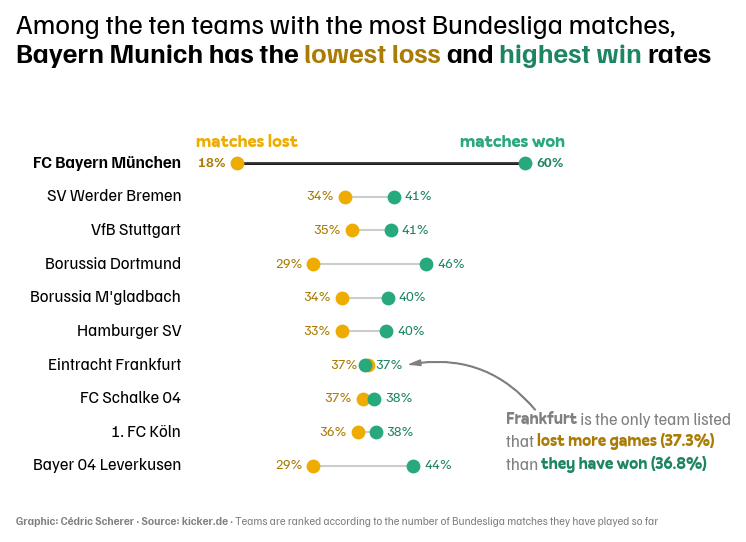

In [41]:
color_lose, color_win = "#EFAC00", "#28A87D"
color_lose_dark, color_win_dark = "#aa7c05", "#1e8563"

fig, ax = plt.subplots(figsize=(7,5))

# horizontal lines
my_range = range(df['team'].nunique())
ax.hlines(y=my_range, xmin=df['lost'], xmax=df['won'], color='grey', alpha=0.4)

# points
ax.scatter(df['lost'], my_range, color=color_lose, zorder=2, s=80)
ax.scatter(df['won'], my_range, color=color_win, zorder=2, s=80)

# add team names
n = len(df)
for i in range(df['team'].nunique()):
    
    # team names
    team_name = df['team'][i]
    if team_name == "FC Bayern München":
        font = grotesk_font_bold
        bayern_munch = df[df['team'] == team_name]
        ax.hlines(y=i, xmin=bayern_munch['lost'], xmax=bayern_munch['won'], linewidth=2, color='black', zorder=1)

    else:
        font = grotesk_font
    ax_text(0.1, i,
            f"<{team_name}>",
            ha='right', va='center',
            fontproperties=grotesk_font,
            highlight_textprops=[
                {"color": "black",
                 "font": font,
                 "size": 12}
            ]
        )

    # losses
    losses = df['lost'][i]
    ax_text(
        losses-0.016, i,
        f"<{df['lost'][i]*100:.0f}%>",
        ha='right', va='center',
        fontproperties=grotesk_font,
        highlight_textprops=[
            {"color": color_lose_dark,
             "font": font}
        ]
    )

    # wins
    wins = df['won'][i]
    ax_text(
        wins+0.016, i,
        f"<{df['won'][i]*100:.0f}%>",
        ha='left', va='center',
        fontproperties=grotesk_font,
        highlight_textprops=[
            {"color": color_win_dark,
             "font": font}]
    )

# title
text = "Among the ten teams with the most Bundesliga matches,\n<Bayern Munich has the> <lowest loss> <and> <highest win> <rates>"
fig_text(
    0.05, 1,
    text,
    fontsize=20,
    fontproperties=grotesk_font,
    ha='left', va='center',
    highlight_textprops=[
        {"font": grotesk_font_bold},
        {"color": color_lose_dark,
         "font": grotesk_font_bold},
        {"font": grotesk_font_bold},
        {"color": color_win_dark,
         "font": grotesk_font_bold},
        {"font": grotesk_font_bold},
    ]
)

# legend annotation
text = '<matches lost>'
fig_text(
    0.38, 0.8,
    text,
    fontsize=13,
    ha='center', va='center',
    highlight_textprops=[
        {"color": color_lose,
         "font": pally_font_bold}
    ]
)
text = '<matches won>'
fig_text(
    0.76, 0.8,
    text,
    fontsize=13,
    ha='center', va='center',
    highlight_textprops=[
        {"color": color_win,
         "font": pally_font_bold}
    ]
)

# credit
text = "<Graphic: Cédric Scherer · Source: kicker.de ·> Teams are ranked according to the number of Bundesliga matches they have played so far"
fig_text(
    0.05, 0.04,
    text,
    fontsize=8,
    fontproperties=grotesk_font,
    color='grey',
    ha='left', va='center',
    highlight_textprops=[
        {"font": grotesk_font_bold}
    ]
)

# remove axis
ax.set_axis_off()

# note about Frankfurt
text = "<Frankfurt> is the only team listed\nthat <lost more games (37.3%)>\nthan <they have won (36.8%)>"
fig_text(
    0.75, 0.2,
    text,
    fontsize=12,
    color='grey',
    fontproperties=grotesk_font,
    ha='left', va='center',
    highlight_textprops=[
        {"font": pally_font_bold},
        {"color": color_lose_dark,
         "font": pally_font_bold},
        {"color": color_win_dark,
         "font": pally_font_bold}
    ]
)

# arrow
from matplotlib.patches import FancyArrowPatch
arrow_style = "Simple, tail_width=0.5, head_width=4, head_length=8"
connection_style = "arc3,rad=.3"
arrow_properties = {
    "arrowstyle": arrow_style,
    "color": "grey",
}
tail_position = (0.62, 1.6)
head_position = (0.43, 3)
arrow = FancyArrowPatch(
    tail_position, head_position,
    connectionstyle=connection_style,
    **arrow_properties
)
ax.add_patch(arrow)

plt.tight_layout()
plt.show()

## Going further

This article explains how to create a [lollipop chart](/lollipop-plot) in matplotlib.

You might also be interested in this [other beautiful dumbell chart](/web-lollipop-plot-with-python-mario-kart-64-world-records) and more generally by how to create [beautiful annotations in matplotlib](/advanced-custom-annotations-matplotlib)